In [1]:
# 라이브러리 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie_titles_df = pd.read_csv('Movie_Id_Titles.csv')

In [3]:
movie_titles_df

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [4]:
movie_ratings_df = pd.read_csv('u.data',sep='\t', names = ['user_id','item_id','rating','timestamp'])
# sep='\t': sep 파라미터는 파일의 구분자를 지정합니다. 
# 기본적으로 read_csv는 쉼표(,)를 구분자로 가정하지만, 
# sep='\t'로 설정함으로써 탭(tab) 문자를 구분자로 사용하도록 지정합니다. 
# 'u.data' 파일이 탭으로 구분된 데이터를 포함하고 있다는 것을 의미합니다.

# names = ['user_id', 'item_id', 'rating', 'timestamp']: 
# names 파라미터는 데이터프레임의 열(column) 이름을 지정합니다. 
# 여기서는 파일의 각 열에 해당하는 이름을 'user_id', 'item_id', 'rating', 'timestamp'로 지정하고 있습니다.
# 이는 파일에 헤더가 없다는 것을 가정하고 있으며, 각 열에 이러한 이름을 부여함으로써 데이터를 더 쉽게 이해하고 다룰 수 있게 합니다.

In [5]:
movie_ratings_df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [6]:
movie_ratings_df.drop(['timestamp'],axis=1,inplace=True)
movie_ratings_df

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
...,...,...,...
99998,880,476,3
99999,716,204,5
100000,276,1090,1
100001,13,225,2


In [7]:
movie_ratings_df.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [8]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   rating   100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [9]:
movie_ratings_df = pd.merge(movie_ratings_df,movie_titles_df, on = 'item_id')
# item_id를 기준으로 결합하라는 뜻

In [10]:
movie_ratings_df

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
99998,840,1674,4,Mamma Roma (1962)
99999,655,1640,3,"Eighth Day, The (1996)"
100000,655,1637,3,Girls Town (1996)
100001,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [11]:
movie_ratings_df.groupby('title').describe()

user_id                                 \
                                        count        mean         std    min   
title                                                                          
'Til There Was You (1997)                 9.0  383.777778  204.272354  152.0   
1-900 (1994)                              5.0  477.000000  244.344020  181.0   
101 Dalmatians (1996)                   109.0  450.330275  295.142779    1.0   
12 Angry Men (1957)                     125.0  453.552000  255.588677    1.0   
187 (1997)                               41.0  517.097561  241.098300    3.0   
...                                       ...         ...         ...    ...   
Young Guns II (1990)                     44.0  504.068182  254.101371   87.0   
Young Poisoner's Handbook, The (1995)    41.0  452.487805  286.352241    7.0   
Zeus and Roxanne (1997)                   6.0  532.833333  343.690219   82.0   
unknown                                   9.0  311.888889  264.160200    1.0   
Á köldum klaka (Cold Fever) (1994)        1.0  655.000000         NaN  655.0   

                                                                  item_id  \
                                         25%    50%    75%    max   count   
title                                                                       
'Til There Was You (1997)              223.0  342.0  530.0  782.0     9.0   
1-900 (1994)                           385.0  405.0  581.0  833.0     5.0   
101 Dalmatians (1996)                  183.0  435.0  699.0  938.0   109.0   
12 Angry Men (1957)                    268.0  429.0  661.0  932.0   125.0   
187 (1997)                             416.0  532.0  698.0  894.0    41.0   
...                                      ...    ...    ...    ...     ...   
Young Guns II (1990)                   301.0  459.0  732.5  943.0    44.0   
Young Poisoner's Handbook, The (1995)  246.0  473.0  634.0  936.0    41.0   
Zeus and Roxanne (1997)                251.5  627.5  796.5  881.0     6.0   
unknown                                130.0  297.0  422.0  833.0     9.0   
Á köldum klaka (Cold Fever) (1994)     655.0  655.0  655.0  655.0     1.0   

                                               ...                 rating  \
                                         mean  ...     75%     max  count   
title                                          ...                          
'Til There Was You (1997)              1300.0  ...  1300.0  1300.0    9.0   
1-900 (1994)                           1353.0  ...  1353.0  1353.0    5.0   
101 Dalmatians (1996)                   225.0  ...   225.0   225.0  109.0   
12 Angry Men (1957)                     178.0  ...   178.0   178.0  125.0   
187 (1997)                              330.0  ...   330.0   330.0   41.0   
...                                       ...  ...     ...     ...    ...   
Young Guns II (1990)                   1188.0  ...  1188.0  1188.0   44.0   
Young Poisoner's Handbook, The (1995)   547.0  ...   547.0   547.0   41.0   
Zeus and Roxanne (1997)                1164.0  ...  1164.0  1164.0    6.0   
unknown                                 267.0  ...   267.0   267.0    9.0   
Á köldum klaka (Cold Fever) (1994)     1633.0  ...  1633.0  1633.0    1.0   

                                                                           \
                                           mean       std  min   25%  50%   
title                                                                       
'Til There Was You (1997)              2.333333  1.000000  1.0  2.00  2.0   
1-900 (1994)                           2.600000  1.516575  1.0  1.00  3.0   
101 Dalmatians (1996)                  2.908257  1.076184  1.0  2.00  3.0   
12 Angry Men (1957)                    4.344000  0.719588  2.0  4.00  4.0   
187 (1997)                             3.024390  1.172344  1.0  2.00  3.0   
...                                         ...       ...  ...   ...  ...   
Young Guns II (1990)                   2.772727  1.008421  1.0  2.

In [12]:
movie_ratings_df.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [13]:
# 영화 rating의 평균치를 가져올거임
rating_df_mean = movie_ratings_df.groupby('title')['rating'].describe()['mean']
rating_df_mean

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: mean, Length: 1664, dtype: float64

In [14]:
rating_df_count = movie_ratings_df.groupby('title')['rating'].describe()['count']
rating_df_count

title
'Til There Was You (1997)                  9.0
1-900 (1994)                               5.0
101 Dalmatians (1996)                    109.0
12 Angry Men (1957)                      125.0
187 (1997)                                41.0
                                         ...  
Young Guns II (1990)                      44.0
Young Poisoner's Handbook, The (1995)     41.0
Zeus and Roxanne (1997)                    6.0
unknown                                    9.0
Á köldum klaka (Cold Fever) (1994)         1.0
Name: count, Length: 1664, dtype: float64

In [15]:
rating_df_mean_count = pd.concat([rating_df_mean,rating_df_count],axis=1)

In [16]:
rating_df_mean_count

,mean,count
title,,
'Til There Was You (1997),2.333333,9.0
1-900 (1994),2.600000,5.0
101 Dalmatians (1996),2.908257,109.0
12 Angry Men (1957),4.344000,125.0
187 (1997),3.024390,41.0
...,...,...
Young Guns II (1990),2.772727,44.0
"Young Poisoner's Handbook, The (1995)",3.341463,41.0
Zeus and Roxanne (1997),2.166667,6.0


In [17]:
# title이 지금 인덱스 이므로 이걸 컬럼으로 바꿔주기
rating_df_mean_count.reset_index(inplace=True)
rating_df_mean_count

,title,mean,count
0,'Til There Was You (1997),2.333333,9.0
1,1-900 (1994),2.600000,5.0
2,101 Dalmatians (1996),2.908257,109.0
3,12 Angry Men (1957),4.344000,125.0
4,187 (1997),3.024390,41.0
...,...,...,...
1659,Young Guns II (1990),2.772727,44.0
1660,"Young Poisoner's Handbook, The (1995)",3.341463,41.0
1661,Zeus and Roxanne (1997),2.166667,6.0
1662,unknown,3.444444,9.0


<Axes: ylabel='Frequency'>

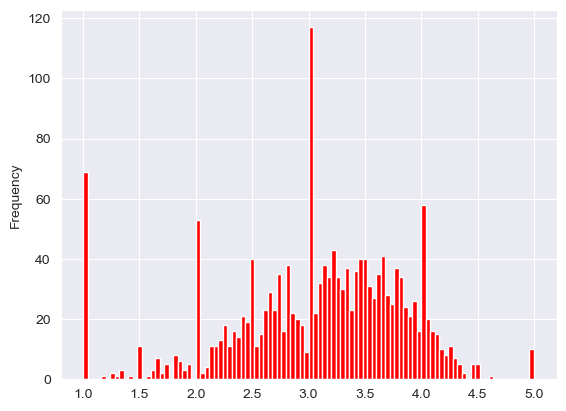

In [18]:
# 그래프로 표현해보기
rating_df_mean_count['mean'].plot(bins = 100, kind = 'hist',color = 'r')

<Axes: ylabel='Frequency'>

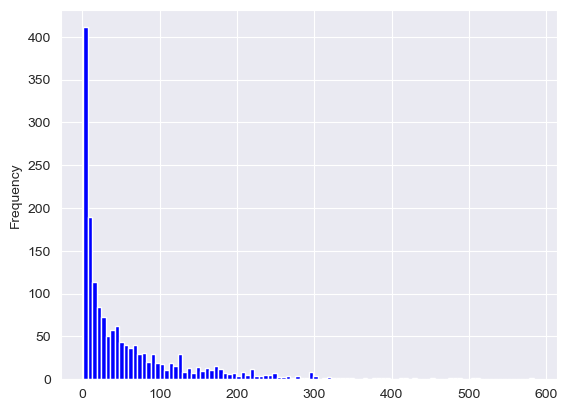

In [19]:
rating_df_mean_count['count'].plot(bins = 100, kind = 'hist',color = 'b')


In [20]:
# 별점 5점 받은 영화확인해보기
rating_df_mean_count[rating_df_mean_count['mean']==5]
# 별점을 5점 받은 건 count가 적은걸 확인할 수 있음

,title,mean,count
30,Aiqing wansui (1994),5.0,1.0
462,Entertaining Angels: The Dorothy Day Story (1996),5.0,1.0
633,"Great Day in Harlem, A (1994)",5.0,1.0
944,Marlene Dietrich: Shadow and Light (1996),5.0,1.0
1172,Prefontaine (1997),5.0,3.0
1273,"Saint of Fort Washington, The (1993)",5.0,2.0
1277,Santa with Muscles (1996),5.0,2.0
1359,Someone Else's America (1995),5.0,1.0
1387,Star Kid (1997),5.0,3.0
1472,They Made Me a Criminal (1939),5.0,1.0


In [21]:
rating_df_mean_count.sort_values('count',ascending=False).head(10) # 내림차순으로 정렬

,title,mean,count
1398,Star Wars (1977),4.359589,584.0
333,Contact (1997),3.803536,509.0
498,Fargo (1996),4.155512,508.0
1234,Return of the Jedi (1983),4.007890,507.0
860,Liar Liar (1997),3.156701,485.0
460,"English Patient, The (1996)",3.656965,481.0
1284,Scream (1996),3.441423,478.0
1523,Toy Story (1995),3.878319,452.0
32,Air Force One (1997),3.631090,431.0
744,Independence Day (ID4) (1996),3.438228,429.0


In [22]:
rating_df_mean_count.sort_values('count',ascending=True).head(10) # 오름차순으로 정렬

,title,mean,count
1663,Á köldum klaka (Cold Fever) (1994),3.0,1.0
980,Mille bolle blu (1993),1.0,1.0
951,Mat' i syn (1997),1.0,1.0
944,Marlene Dietrich: Shadow and Light (1996),5.0,1.0
931,"Man from Down Under, The (1943)",1.0,1.0
927,Mamma Roma (1962),4.0,1.0
915,Mad Dog Time (1996),3.0,1.0
166,"Big Bang Theory, The (1994)",4.0,1.0
911,MURDER and murder (1996),2.0,1.0
322,Coldblooded (1995),2.0,1.0


## 아이템 기반 협업 필터링을 영화 샘플에 적용하기


In [23]:
movie_ratings_df

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
99998,840,1674,4,Mamma Roma (1962)
99999,655,1640,3,"Eighth Day, The (1996)"
100000,655,1637,3,Girls Town (1996)
100001,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [24]:
user_id_movietitle_matrix = movie_ratings_df.pivot_table(index='user_id', columns='title', values='rating')
user_id_movietitle_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
titanic = user_id_movietitle_matrix['Titanic (1997)']
titanic
# 타이타닉에 사람들이 어떤 점수를 줬는지 볼 수 있음 

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

<Axes: ylabel='Frequency'>

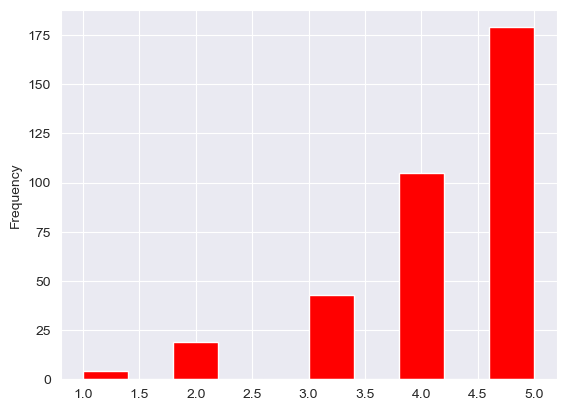

In [26]:
titanic.plot(kind = 'hist',color = 'r')

In [27]:
titanic_correlation = pd.DataFrame(user_id_movietitle_matrix.corrwith(titanic),columns=['Correlation'])
titanic_correlation

/Users/hyun-uk/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/hyun-uk/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654
...,...
Young Guns II (1990),0.317274
"Young Poisoner's Handbook, The (1995)",0.356783
Zeus and Roxanne (1997),NaN


In [28]:
# 결측치 제거
titanic_correlation.dropna(inplace=True)
titanic_correlation

,Correlation
title,
'Til There Was You (1997),-0.062017
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654
2 Days in the Valley (1996),0.017295
...,...
Year of the Horse (1997),1.000000
Young Frankenstein (1974),0.107666
Young Guns (1988),0.199931


In [29]:
titanic_correlation.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Nadja (1994),1.0
"Pest, The (1997)",1.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0
For Ever Mozart (1996),1.0
"Jerky Boys, The (1994)",1.0
"Newton Boys, The (1998)",1.0
Hearts and Minds (1996),1.0
"Simple Wish, A (1997)",1.0
Purple Noon (1960),1.0


In [30]:
# 이유모를 카운트가 안되는 관계로 여기까지